# CLUSTERING ANALYSIS 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("EastWestAirlines[1].xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.shape

(3999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()
df.fillna(df.mean())

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


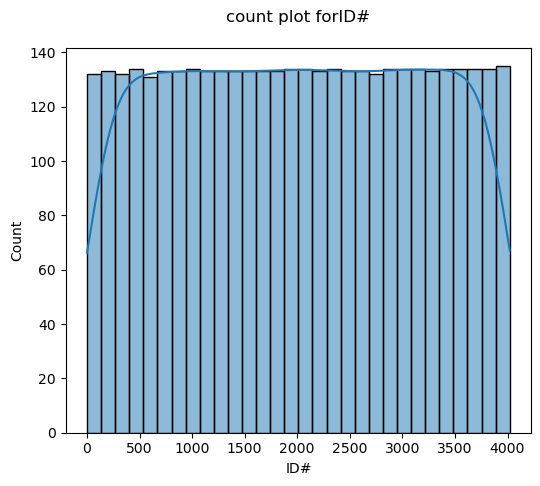

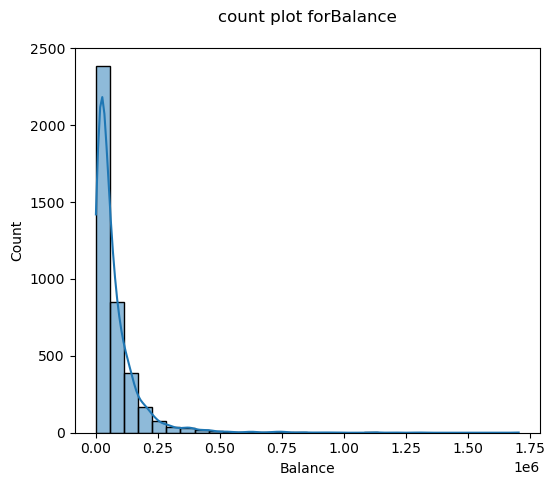

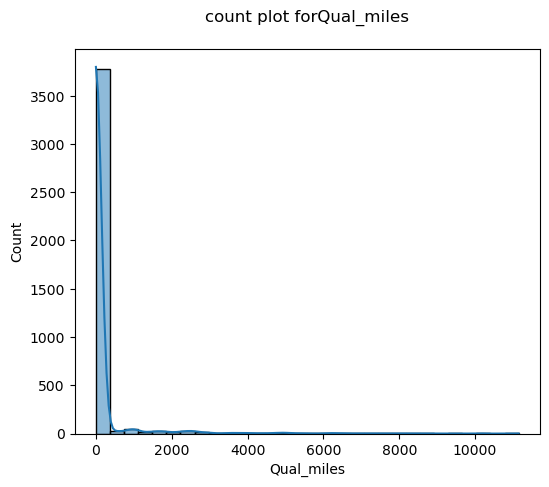

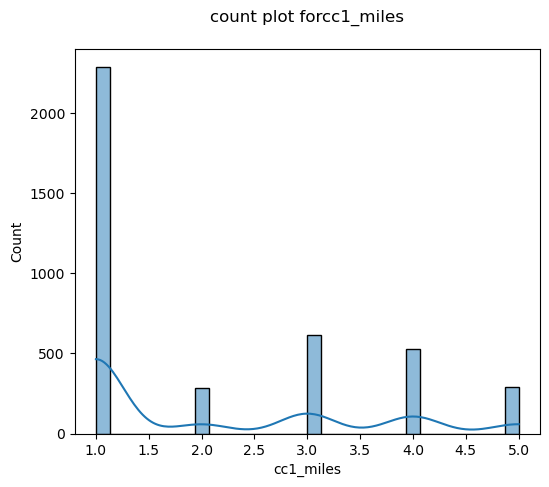

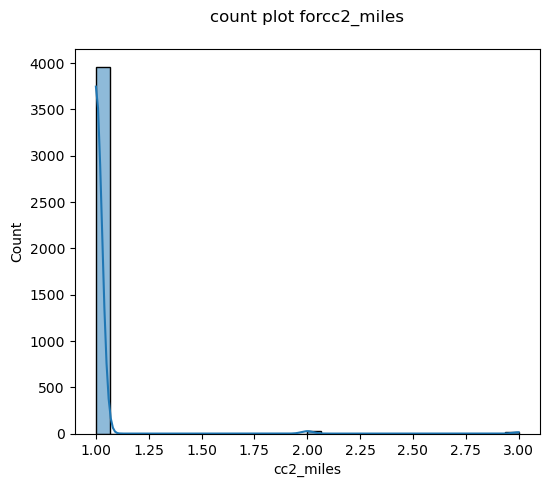

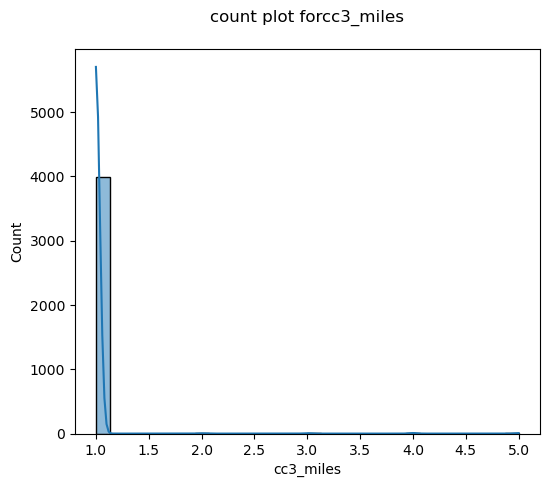

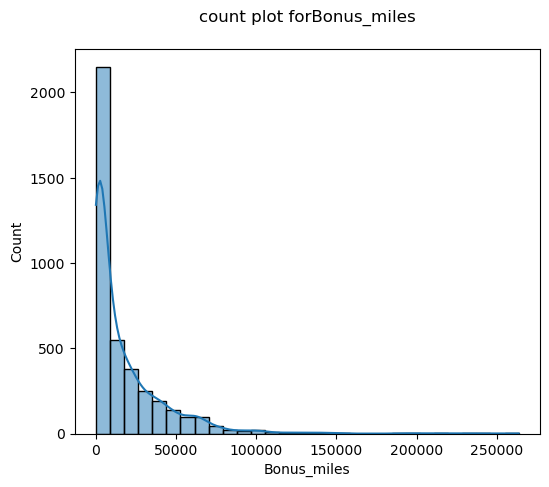

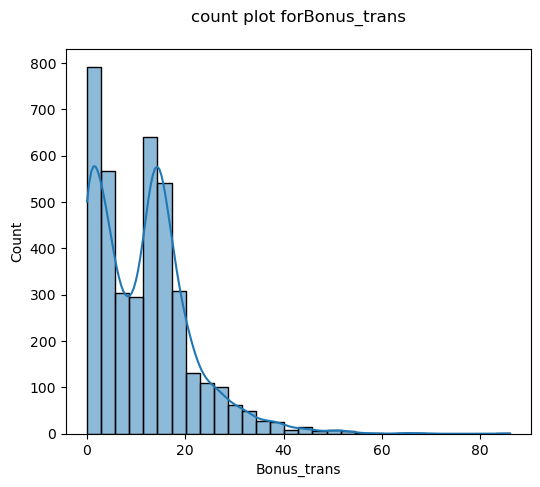

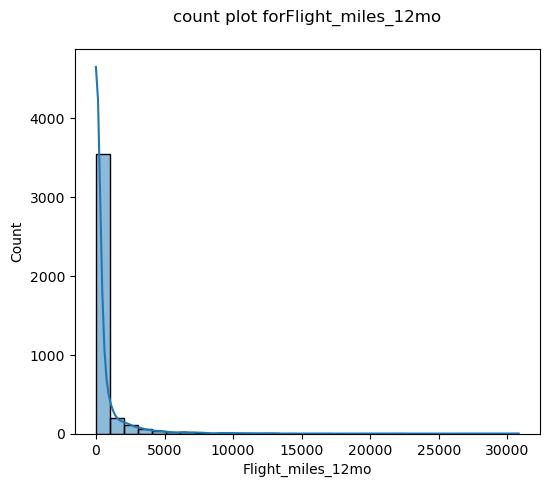

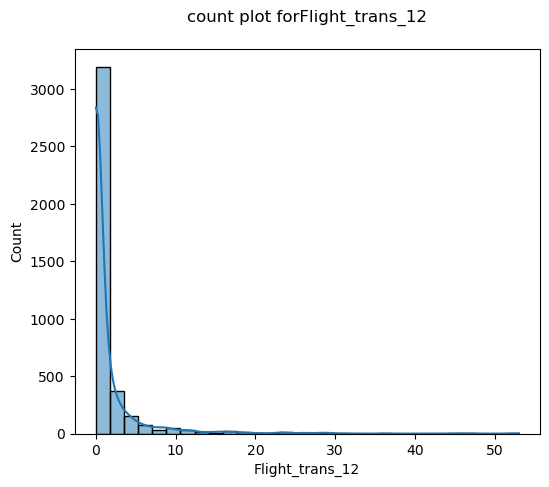

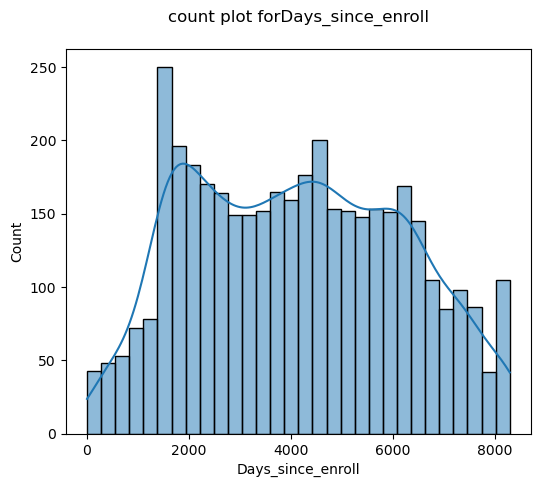

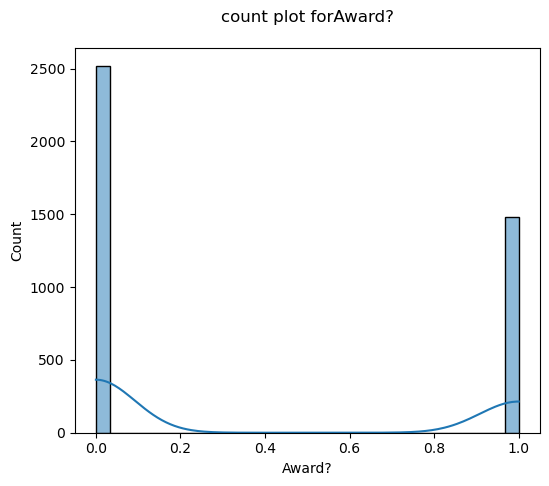

In [9]:
for i in df:
    plt.figure(figsize=[6,5])
    sns.histplot(df[i],kde=True,bins=30)
    plt.title(f"count plot for{i}\n")
    plt.show()

<Axes: >

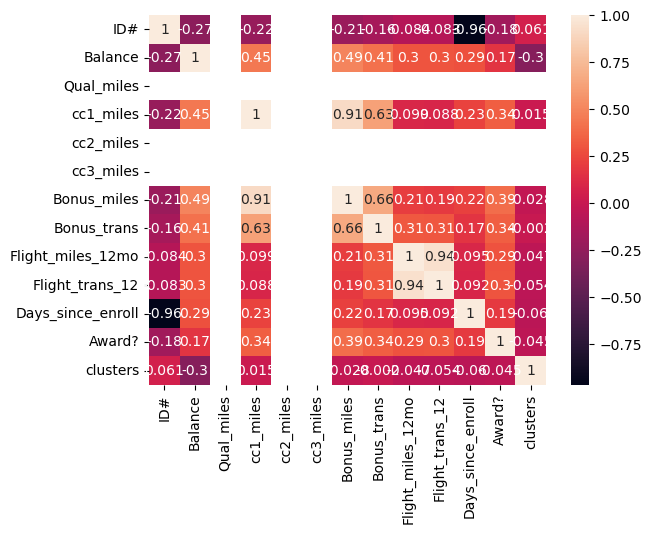

In [23]:
corr=df.corr()
sns.heatmap(corr,annot=True)

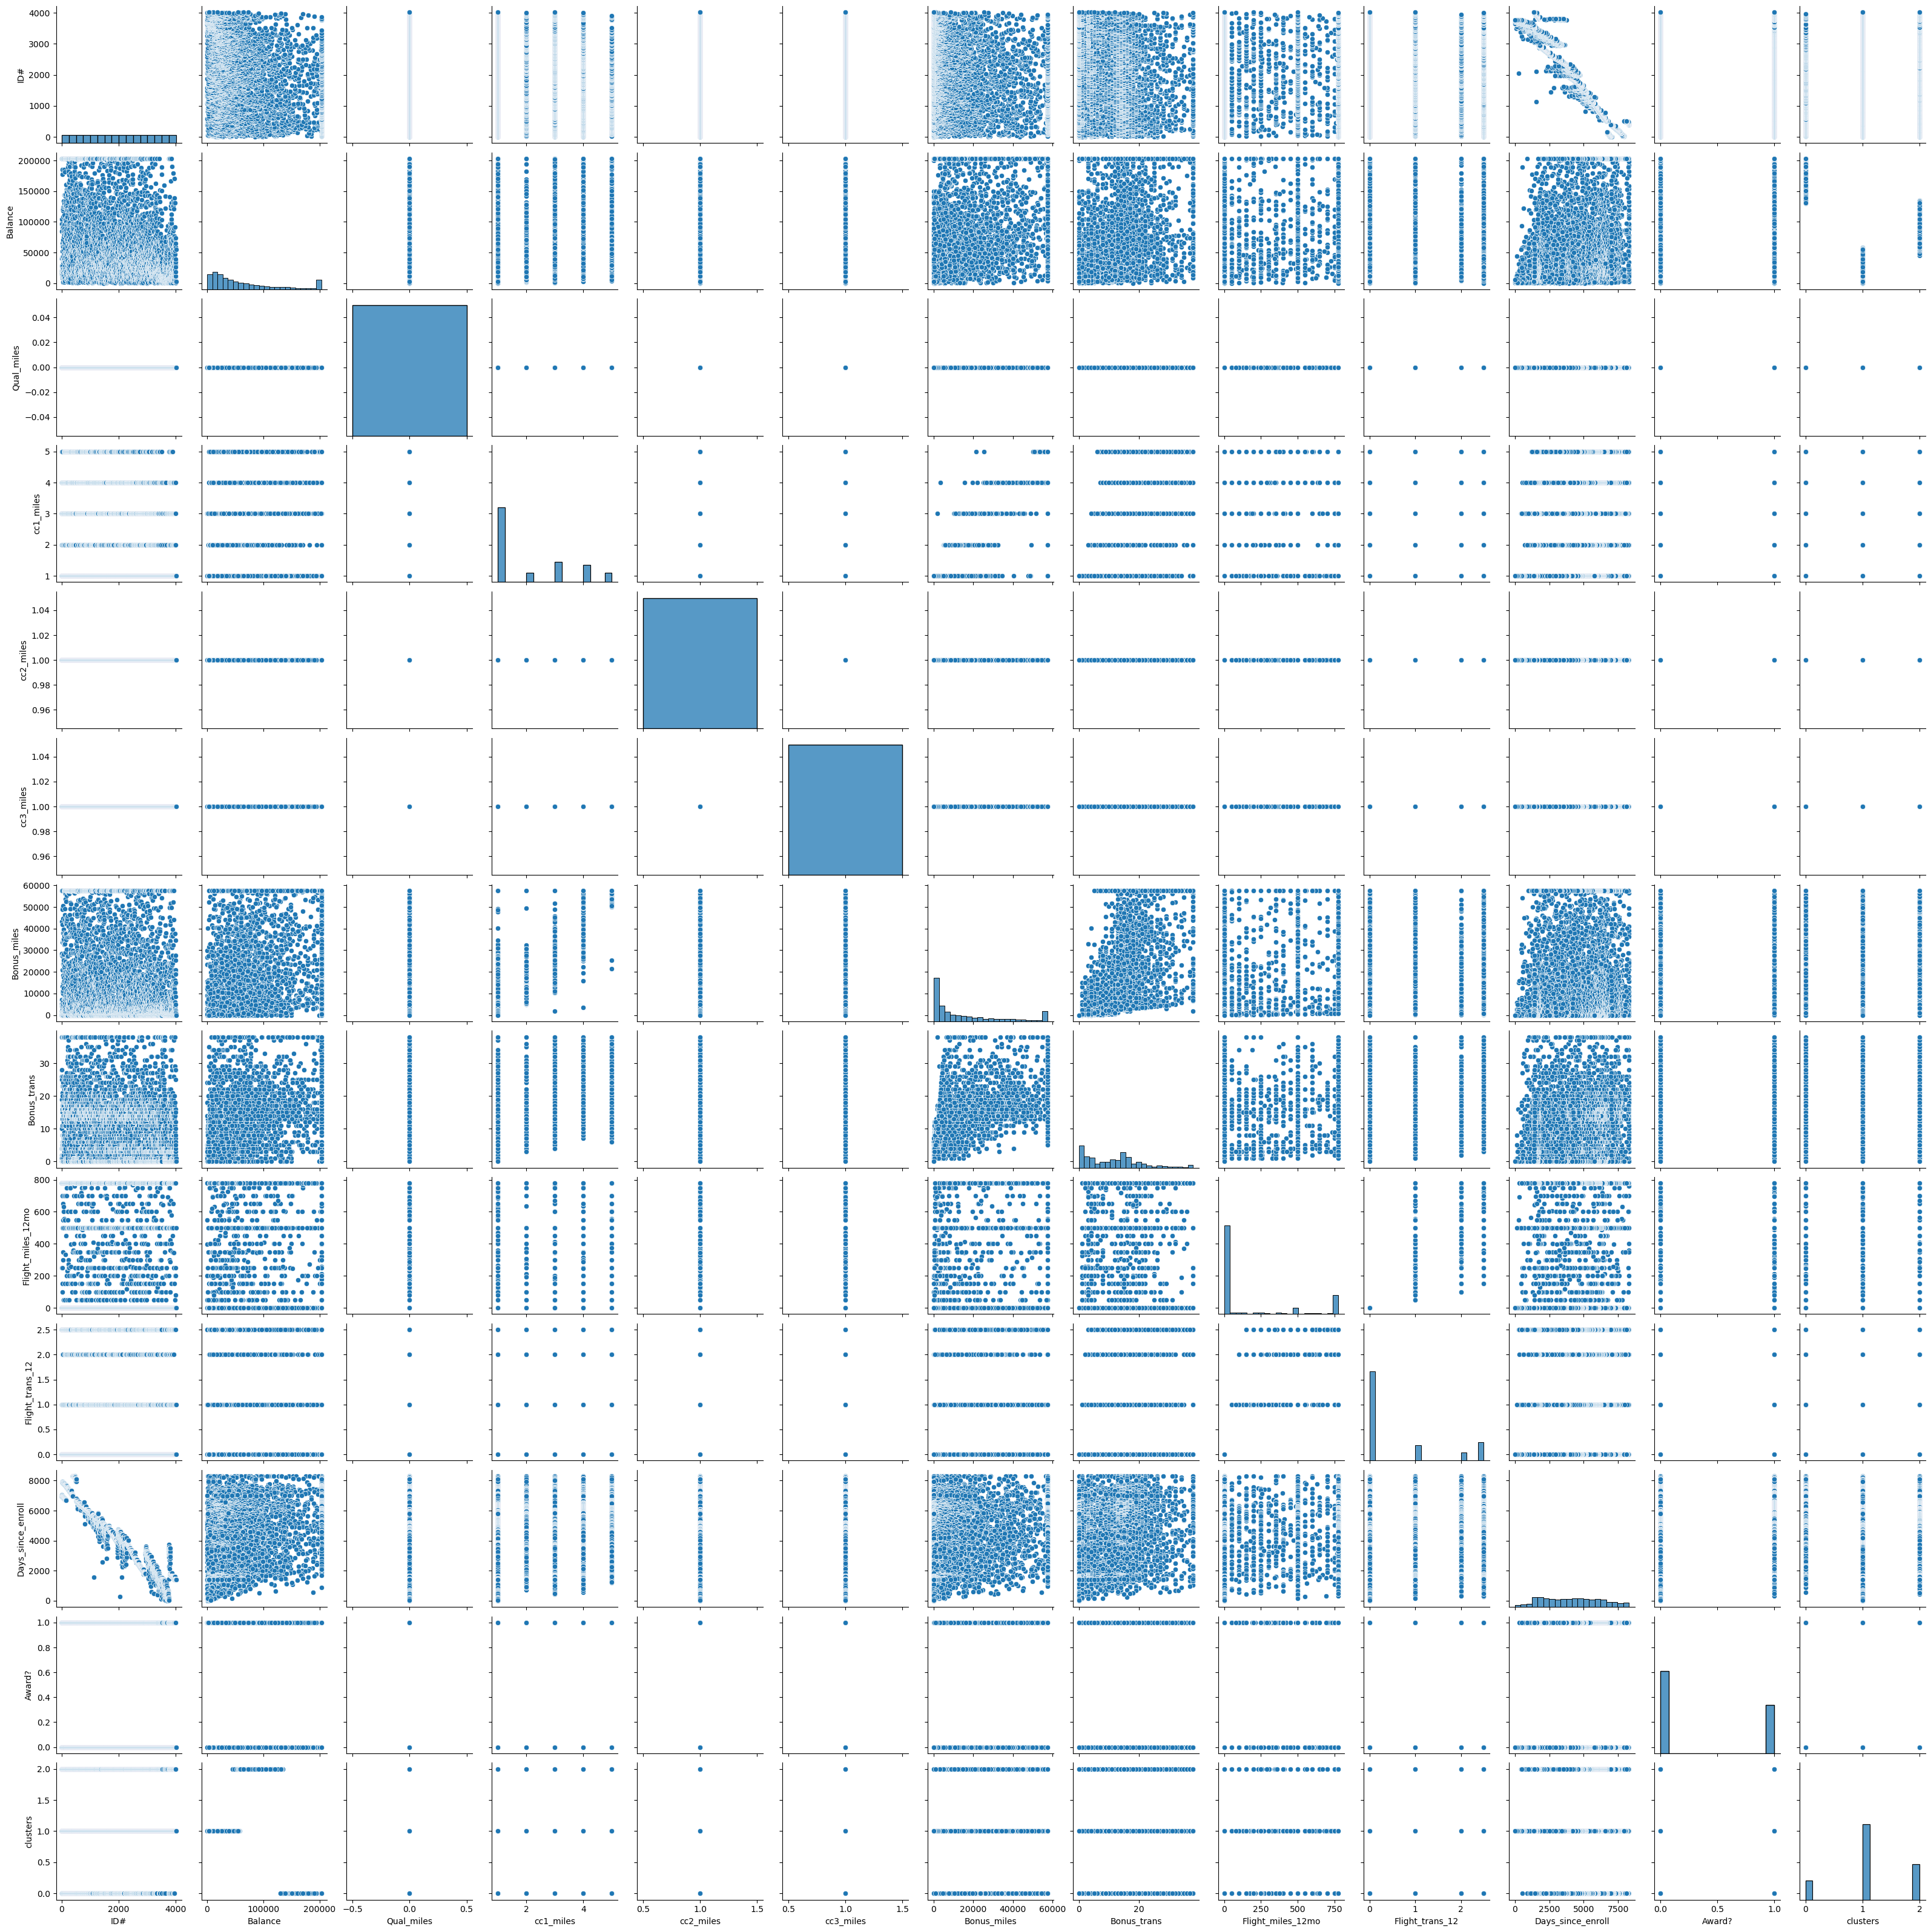

In [25]:
sns.pairplot(df)
plt.show()

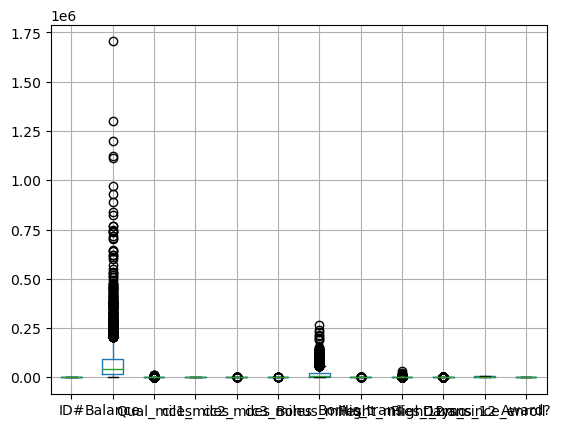

In [10]:
df.shape
df.boxplot()
plt.show()

In [11]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

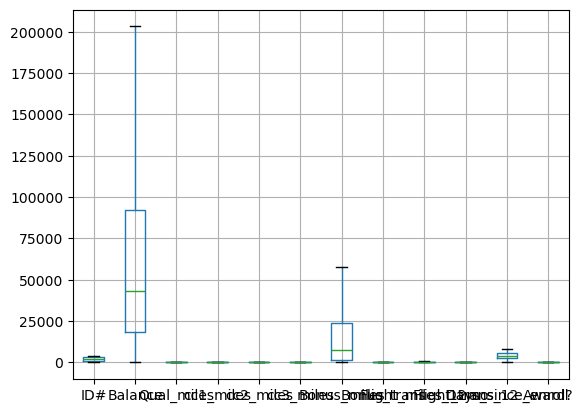

In [12]:
df.boxplot()
plt.show()

## Implementing Clustering Algorithms

In [14]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit_transform(df)

array([[-1.73512503, -0.60725829,  0.        , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [15]:
from sklearn.cluster import KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### 1-Kmeans

In [31]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(df)
clusters

KMeans(n_clusters=2)

In [32]:
np.unique(clusters.labels_)

array([0, 1], dtype=int32)

In [33]:
df["clusters"]=clusters.labels_
df["clusters"]

0       0
1       0
2       0
3       0
4       1
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: clusters, Length: 3999, dtype: int32

In [34]:
silhouette_score(df,clusters.labels_)

np.float64(0.6424795044974123)

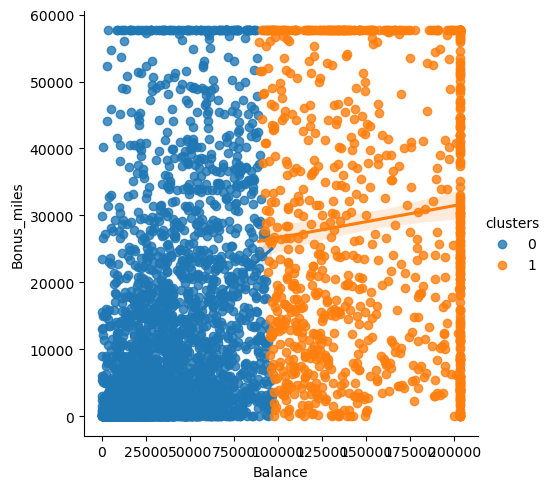

In [48]:
sns.lmplot(data=df,x="Balance",y="Bonus_miles",hue="clusters")

### Elbov method

In [27]:
kmean=KMeans(n_clusters=2)
cluster=kmean.fit(df)
silhouette_score(df,cluster.labels_)

np.float64(0.6421762782970912)

In [29]:
inertia=[]  
for i in range(1,11):
     kmeans=KMeans(n_clusters=i)
     kmeans.fit(df)
     inertia.append(kmeans.inertia_) 
print(inertia)

[15092442902611.389, 4478344164881.999, 2442763729610.3545, 1724247067160.9895, 1451312756205.19, 1258906792055.138, 1023282642959.4724, 875464015782.97, 732073911536.6663, 630291467602.8228]


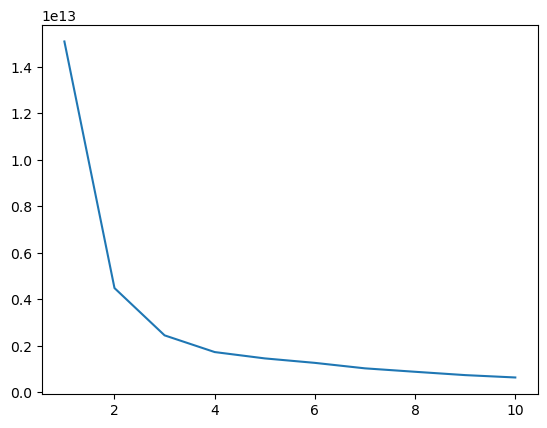

In [30]:
plt.plot(range(1,11),inertia)

### 2-DBSCAN

In [81]:
dbscan = DBSCAN(eps=0.8, min_samples=9)
db=dbscan.fit_predict(df)
db

array([-1, -1, -1, ..., -1, -1, -1])

In [83]:
np.unique(db)

array([-1])

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

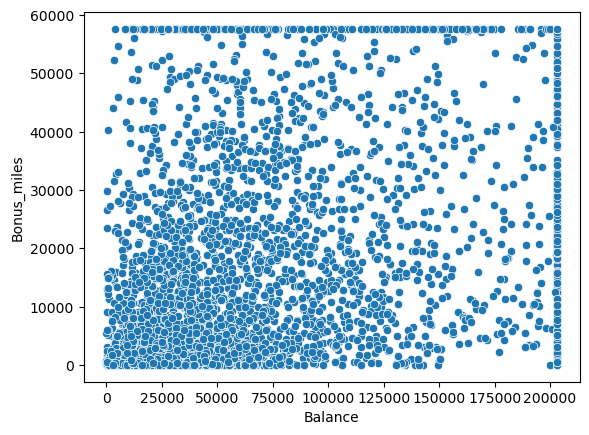

In [47]:
sns.scatterplot(data=df,x='Balance',y='Bonus_miles',palette="set2")

### Hierarchical Clustering

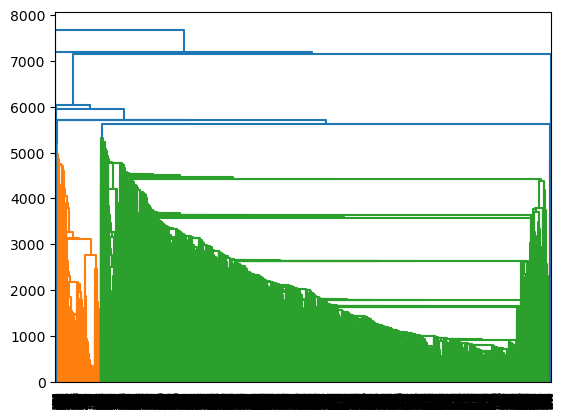

In [53]:
dendrogram=sch.dendrogram(sch.linkage(df,method="single"))


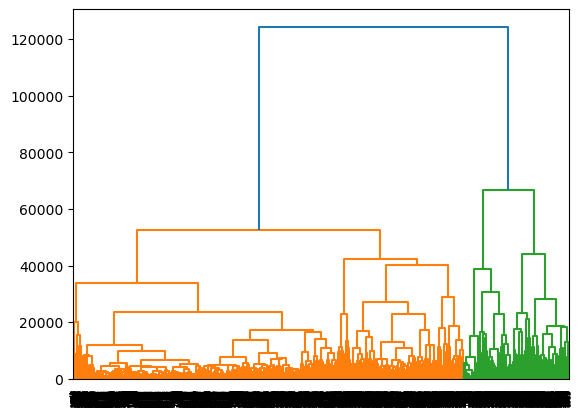

In [55]:
dendrogram1=sch.dendrogram(sch.linkage(df,method="centroid"))

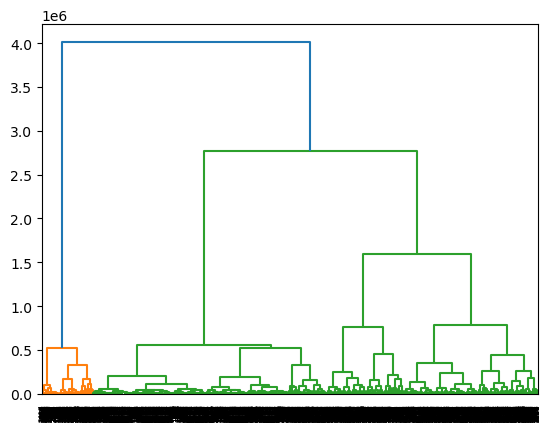

In [57]:
dendrogram2=sch.dendrogram(sch.linkage(df,method="ward"))

In [71]:
agg=AgglomerativeClustering(n_clusters=2,linkage="average")
agg

AgglomerativeClustering(linkage='average')

In [72]:
agg1=agg.fit(df)
agg1

AgglomerativeClustering(linkage='average')

In [73]:
np.unique(agg1.labels_)

array([0, 1])

In [74]:
silhouette_score(df,agg1.labels_)

np.float64(0.6450350567318819)